## 第65讲 量化交易Quant-使用Stacked LSTM预测T+1上证指数


## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

Quantitative analysts, or financial quantitative analysts, develop and implement complex mathematical models that financial firms use to make decisions about risk management, investments and pricing.

In [254]:
T=3
N=1

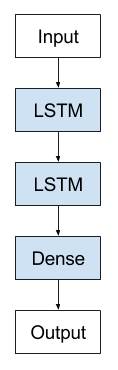

In [226]:
#A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers. An LSTM layer below provides 
#a sequence output rather than a single value output to the LSTM layer below

from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson64-architecture_stacked_lstm.png')

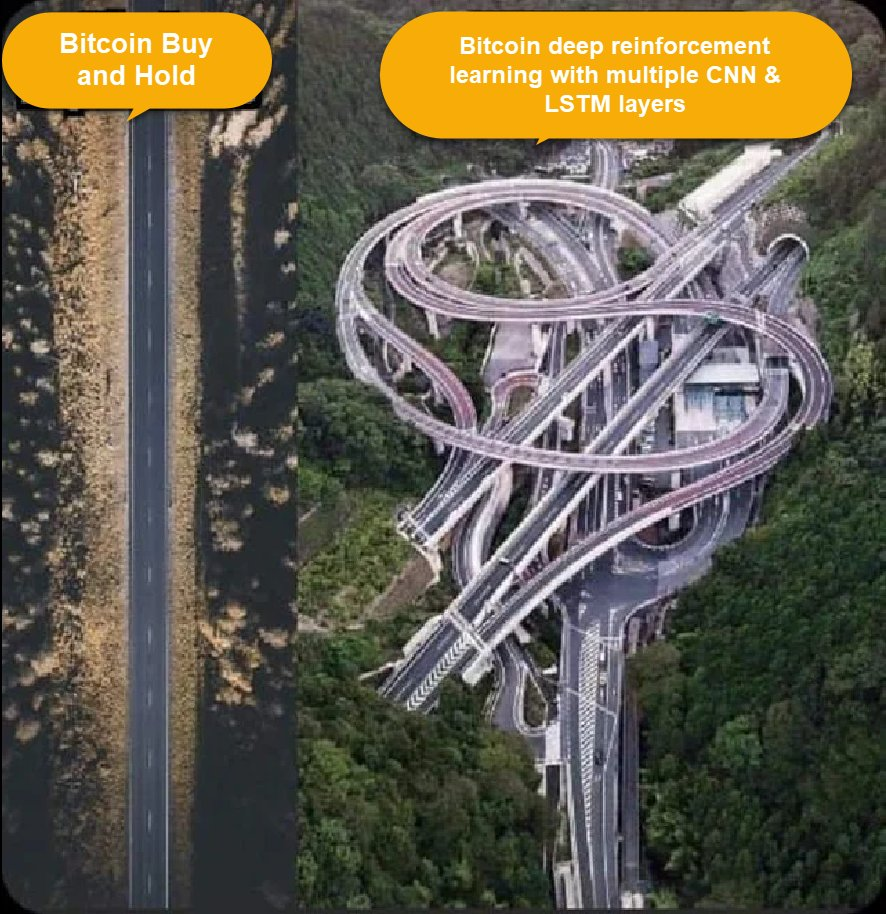

In [227]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson65-1.jpg')

In [255]:
import os
import time
import requests
import sys
import pandas as pd

In [256]:
df=pd.read_csv('http://quotes.money.163.com/service/chddata.html?code=0000001&start=19901219&end=&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;VOTURNOVER;VATURNOVER',encoding='GBK')

In [258]:
df

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2021-01-19,'000001,上证指数,3566.3814,3603.1477,3553.0236,3596.3564,3596.2237,-29.8423,-0.8298,323439541,4.67402582397e+11
1,2021-01-18,'000001,上证指数,3596.2237,3608.7665,3544.2614,3554.7977,3566.3778,29.8459,0.8369,301652565,4.5174070045e+11
2,2021-01-15,'000001,上证指数,3566.3778,3589.2655,3533.7882,3566.2847,3565.9046,0.4732,0.0133,324612744,4.80343780956e+11
3,2021-01-14,'000001,上证指数,3565.9046,3599.0584,3559.6001,3584.9324,3598.6518,-32.7472,-0.91,347666819,5.11325103696e+11
4,2021-01-13,'000001,上证指数,3598.6518,3622.3475,3575.5945,3613.2810,3608.3389,-9.6871,-0.2685,388127791,5.54853439062e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
7350,1990-12-25,'000001,上证指数,120.2500,120.2500,114.5500,120.0900,114.55,5.7,4.976,15,6000.0
7351,1990-12-24,'000001,上证指数,114.5500,114.5500,109.1300,113.5700,109.13,5.42,4.9666,32,31000.0
7352,1990-12-21,'000001,上证指数,109.1300,109.1300,103.7300,109.0700,104.39,4.74,4.5407,28,16000.0
7353,1990-12-20,'000001,上证指数,104.3900,104.3900,99.9800,104.3000,99.98,4.41,4.4109,197,84000.0


In [259]:
#Time Series Data using stacked LSTM Deep Learning

#df=pd.read_csv('D:/python/stockmarket/000001.csv',encoding='GBK') 
df1=df.reset_index()[['日期','收盘价']]

df1.shape

(7355, 2)

In [260]:
df1

,日期,收盘价
0,2021-01-19,3566.3814
1,2021-01-18,3596.2237
2,2021-01-15,3566.3778
3,2021-01-14,3565.9046
4,2021-01-13,3598.6518
...,...,...
7350,1990-12-25,120.2500
7351,1990-12-24,114.5500
7352,1990-12-21,109.1300
7353,1990-12-20,104.3900


In [261]:
df1=df1.sort_index(ascending=False)

In [262]:
df1

,日期,收盘价
7354,1990-12-19,99.9800
7353,1990-12-20,104.3900
7352,1990-12-21,109.1300
7351,1990-12-24,114.5500
7350,1990-12-25,120.2500
...,...,...
4,2021-01-13,3598.6518
3,2021-01-14,3565.9046
2,2021-01-15,3566.3778
1,2021-01-18,3596.2237


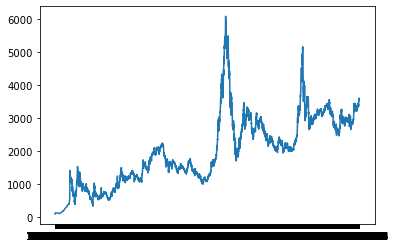

In [235]:
import matplotlib.pyplot as plt
plt.plot(df1['日期'],df1['收盘价'])

In [263]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1['收盘价']).reshape(-1,1))

In [264]:
df2.shape

(7355, 1)

In [265]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.7)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [266]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = T
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [267]:
X_train.shape

(5144, 3)

In [268]:
X_test.shape

(2203, 3)

In [269]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [270]:
X_test.shape

(2203, 3, 1)

In [271]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(5,return_sequences=True,input_shape=(T,1)))
model.add(LSTM(5,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [272]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=1,verbose=1)

Epoch 1/2
5144/5144 [==============================] - 29s 6ms/step - loss: 0.0024 - val_loss: 5.1234e-04
Epoch 2/2
5144/5144 [==============================] - 28s 5ms/step - loss: 2.4495e-04 - val_loss: 3.5100e-04


In [273]:
import tensorflow as tf

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1952.8182401944016

In [274]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

2992.8627180001986

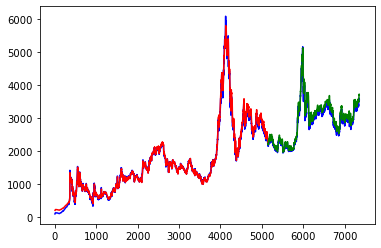

In [275]:
### Plotting 
# shift train predictions for plotting
look_back=T
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2),'blue')
plt.plot(trainPredictPlot,'red')
plt.plot(testPredictPlot,'green')
plt.show()

In [276]:
len(test_data)

2207

In [277]:
x_input=test_data[len(test_data)-T:].reshape(1,-1)
x_input.shape

(1, 3)

In [278]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [279]:
# demonstrate prediction for next 5 days
from numpy import array

lst_output=[]
n_steps=T
i=0
while(i<N):
    
    if(len(temp_input)>T):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.6022441]
4
[[0.6022440791130066]]


In [280]:
scaler.inverse_transform(lst_output)

array([[3708.67289484]])